In [1]:
# here we test the results of two platforms against each other 
# while running the same QASM file (take form benchmark datasets)
# - QASMBench
# - Tket benchmark dataset

In [16]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [61]:
config = load_config_and_check("../config/experiment_v09.yaml")

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analysis of Results

In [63]:
from analyser import Explorer

In [69]:
exp = Explorer(config)

BENCHMARK: qasm_bench_mid - PROGRAM INFO - reading ...  
BENCHMARK: tket_bench_1 - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_qiskit - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_cirq - PROGRAM INFO - reading ...  
BENCHMARK: program_vs_random - PROGRAM INFO - reading ...  
BENCHMARK: negation - PROGRAM INFO - reading ...  
BENCHMARK: program_x_vs_program_y - PROGRAM INFO - reading ...  
BENCHMARK: qasm_bench_mid - EXECUTION INFO - reading ...  
BENCHMARK: tket_bench_1 - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_qiskit - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_cirq - EXECUTION INFO - reading ...  
BENCHMARK: program_vs_random - EXECUTION INFO - reading ...  
BENCHMARK: negation - EXECUTION INFO - reading ...  
BENCHMARK: program_x_vs_program_y - EXECUTION INFO - reading ...  
BENCHMARK: qasm_bench_mid - GROUND TRUTH - reading ...  
BENCHMARK: tket_bench_1 - GROUND TRUTH - reading ...  
BENCHMARK: across_runs_qiskit - GROUND TRUTH - reading ...

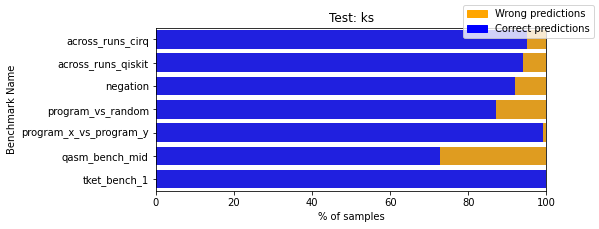

In [65]:
exp.classify_based_on_pvalue()
exp.focus_on_detector("ks")
exp.plot_benchmark_categories()

In [72]:
import seaborn as sns

In [73]:
exp.df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 1220
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   circuit_id                  611 non-null    object 
 1   benchmark_name              611 non-null    object 
 2   test                        611 non-null    object 
 3   platform_a                  611 non-null    object 
 4   platform_b                  611 non-null    object 
 5   path_exec_a                 611 non-null    object 
 6   path_exec_b                 611 non-null    object 
 7   statistic                   611 non-null    float64
 8   p_value                     611 non-null    float64
 9   random_seed                 611 non-null    float64
 10  expected_divergence         611 non-null    bool   
 11  label                       611 non-null    int64  
 12  n_qubits                    611 non-null    int64  
 13  strategy_a                  611 no

<AxesSubplot:xlabel='statistic', ylabel='Count'>

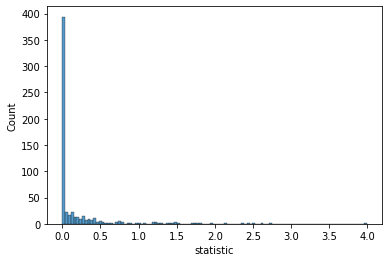

In [74]:
df_internal = exp.df_all
df_energy = df_internal[df_internal["test"] == "energy"]
sns.histplot(
    data=df_energy,
    x="statistic"
)

We raise an alert for all the data with a statistic higher than: 0.001


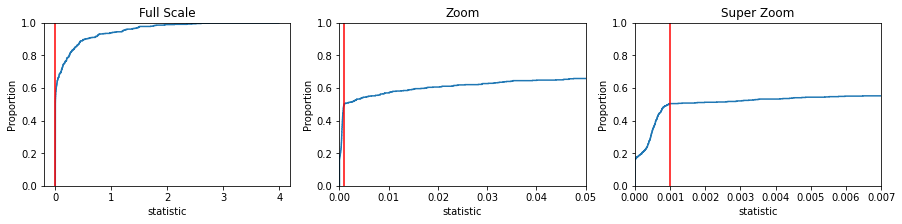

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
ax_super_zoom = axes[2]
ax_zoom = axes[1]
ax_normal = axes[0]

sns.ecdfplot(
    data=df_energy,
    x="statistic",
    ax=ax_normal
)
ax_normal.set_title("Full Scale")

sns.ecdfplot(
    data=df_energy,
    x="statistic",
    ax=ax_zoom
)
ax_zoom.set_xlim(0,0.05)
ax_zoom.set_title("Zoom")

sns.ecdfplot(
    data=df_energy,
    x="statistic",
    ax=ax_super_zoom
)
ax_super_zoom.set_xlim(0,0.007)
ax_super_zoom.set_title("Super Zoom")

THRESHOLD_ON_STATISTIC = .001
ax_normal.axvline(x=THRESHOLD_ON_STATISTIC, color='r')
ax_zoom.axvline(x=THRESHOLD_ON_STATISTIC, color='r')
ax_super_zoom.axvline(x=THRESHOLD_ON_STATISTIC, color='r')
print(f"We raise an alert for all the data with a statistic higher than: {THRESHOLD_ON_STATISTIC}")

In [127]:
df_energy['p_value'] = (df_energy['statistic'] < THRESHOLD_ON_STATISTIC).astype(int)

In [128]:
df_energy.head()

,circuit_id,benchmark_name,test,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,random_seed,...,circuit_id_execution_level,execution_a,execution_b,output_size_a,output_size_b,output_size_total,output_coverage_a,output_coverage_b,prediction_divergence,correct_prediction
0,0,across_runs_cirq,energy,cirq_run_1,cirq_run_2,../data/experiment_v09/across_runs_cirq/execut...,../data/experiment_v09/across_runs_cirq/execut...,0.000366,1,1234.0,...,0_0,"{'01010': 386, '00001': 3038, '11100': 368, '1...","{'00101': 180, '11001': 1129, '00100': 1475, '...",32,32,32,1.000000,1.000000,False,True
2,58,program_vs_random,energy,cirq,fake_random,../data/experiment_v09/program_vs_random/execu...,../data/experiment_v09/program_vs_random/execu...,0.068261,0,1234.0,...,58_0,"{'101': 2037, '011': 700, '010': 1763, '001': ...","{'111': 989, '001': 1068, '010': 1062, '101': ...",8,8,8,1.000000,1.000000,True,True
4,58,program_x_vs_program_y,energy,cirq_algo_x,cirq_algo_y,../data/experiment_v09/program_x_vs_program_y/...,../data/experiment_v09/program_x_vs_program_y/...,0.122314,0,1234.0,...,58_0,"{'1110': 432, '0110': 125, '0011': 1005, '1001...","{'1110': 826, '1100': 493, '1101': 680, '0101'...",15,16,16,0.937500,0.937500,True,True
6,58,tket_bench_1,energy,cirq,qiskit,../data/experiment_v09/tket_bench_1/executions...,../data/experiment_v09/tket_bench_1/executions...,0.000000,1,1234.0,...,58_0,{'0000000000101100': 8192},{'0000000000101100': 8192},1,1,65536,0.000015,0.000015,False,True
8,59,across_runs_cirq,energy,cirq_run_1,cirq_run_2,../data/experiment_v09/across_runs_cirq/execut...,../data/experiment_v09/across_runs_cirq/execut...,0.000366,1,1234.0,...,59_0,"{'011100': 196, '001111': 312, '010001': 282, ...","{'011010': 406, '010010': 256, '100100': 321, ...",64,64,64,1.000000,1.000000,False,True


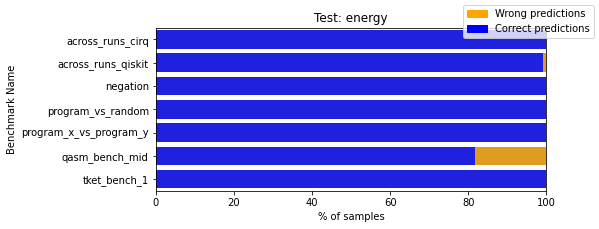

In [129]:
exp.df_all = df_energy
exp.classify_based_on_pvalue(treshold=0.05)
exp.focus_on_detector("energy")
exp.plot_benchmark_categories()

## Devlopment of ChiSquare test

In [35]:
from scipy.stats import chisquare
import numpy as np

In [32]:
res_a = {"010000011": 11, "000001010": 217, "001111000": 47, "110000011": 171, "101000001": 77, "000001001": 74, "010000010": 98, "011111011": 21, "101101011": 10, "110111010": 15, "110001010": 126, "001001000": 133, "001000011": 88, "000001000": 175, "100010010": 39, "101001010": 73, "110000001": 162, "101000010": 138, "110111000": 25, "100110010": 22, "001000001": 86, "111111010": 24, "100001001": 155, "101001011": 257, "010000000": 106, "111010001": 1, "000000000": 101, "100001000": 9, "110001000": 148, "100110000": 20, "000000011": 150, "011001010": 76, "101000000": 138, "010110011": 13, "011000010": 146, "011001011": 140, "010011110": 7, "000001011": 64, "011000000": 159, "101010000": 48, "101001001": 222, "000111010": 15, "110000000": 79, "001100001": 18, "111110011": 16, "100010000": 38, "110001011": 74, "001010011": 28, "101010010": 46, "011001001": 182, "011001000": 76, "101001000": 98, "111111000": 21, "001010001": 28, "010001011": 73, "000111011": 5, "001100000": 18, "111100001": 9, "000110011": 16, "111011000": 27, "000000010": 78, "111001000": 96, "001001010": 149, "110010100": 6, "000000001": 125, "101110000": 10, "101010011": 15, "010010101": 13, "100001011": 146, "011011001": 41, "001001011": 22, "010111001": 31, "001010000": 8, "111001010": 89, "111011101": 23, "010011101": 4, "010001101": 1, "100111000": 8, "010001001": 102, "101100010": 22, "011000001": 66, "010011011": 22, "100000000": 66, "100010101": 9, "000111000": 18, "100100000": 9, "101000011": 70, "011000011": 64, "100010111": 11, "011011100": 6, "011110010": 12, "001000010": 16, "011011011": 26, "010011100": 9, "001011110": 2, "001011011": 1, "111000011": 84, "000111111": 1, "001011010": 3, "111111001": 16, "011010010": 4, "100100010": 15, "010011111": 12, "100000011": 7, "101010100": 4, "110001001": 68, "111110001": 19, "111110000": 7, "111011111": 17, "100000010": 62, "001111011": 12, "110100001": 9, "011110000": 6, "110000010": 83, "001111010": 41, "000010000": 11, "001011111": 19, "111111011": 17, "010100000": 11, "111010100": 10, "100111001": 21, "100000001": 9, "001000000": 14, "101111000": 10, "111011010": 23, "100011100": 15, "000110000": 1, "000010001": 43, "100000110": 1, "111110010": 16, "100100001": 5, "100010100": 9, "001100011": 9, "111010110": 13, "010111010": 14, "100010001": 8, "111000001": 110, "110000110": 1, "100011110": 12, "011011110": 7, "010001010": 17, "110011000": 31, "100011101": 8, "010001000": 13, "001010101": 6, "011111001": 9, "010000001": 13, "001010100": 14, "110110001": 15, "111001001": 17, "101111011": 23, "000011101": 10, "111011001": 5, "101101010": 1, "111100011": 3, "010110001": 4, "011011101": 3, "000011111": 14, "111000111": 1, "111000010": 13, "001110010": 10, "111000000": 13, "001011101": 16, "010110000": 19, "110011011": 10, "011001100": 3, "110011110": 2, "000010110": 4, "100010011": 12, "000100110": 2, "100111010": 11, "100101011": 9, "001100010": 12, "010010110": 9, "011110001": 3, "010011010": 4, "111011110": 10, "111010111": 7, "001010111": 3, "101011111": 1, "111100010": 4, "111001101": 3, "110110011": 7, "000010011": 35, "100001010": 13, "110011001": 6, "010011000": 6, "011011000": 7, "101010001": 16, "110001101": 8, "101100110": 4, "100111011": 36, "010111011": 30, "101011100": 5, "001001001": 23, "001010110": 18, "010010100": 7, "100100011": 6, "101011110": 6, "101100000": 11, "110110010": 6, "111011011": 8, "001110000": 4, "011010101": 7, "010110010": 12, "100010110": 5, "011011010": 9, "110010011": 5, "001110001": 12, "001101001": 2, "100110001": 9, "110110000": 3, "110011111": 8, "110010000": 4, "110011010": 21, "000100011": 17, "011101101": 1, "101101111": 2, "010100010": 5, "010010111": 17, "100011111": 9, "000110010": 1, "110111101": 1, "001010010": 1, "011011111": 8, "000010100": 9, "101111110": 1, "010011001": 23, "110010110": 5, "011100010": 5, "110101000": 1, "011010011": 6, "101110010": 12, "101100011": 5, "001110011": 7, "111100000": 3, "001101111": 3, "110011101": 8, "011100100": 3, "110111100": 2, "100000100": 1, "101100101": 1, "000110001": 11, "001011100": 7, "111011100": 4, "110010001": 4, "000101011": 2, "101100001": 5, "101011101": 3, "000010010": 11, "010100011": 4, "101101001": 9, "011010110": 1, "001111001": 13, "101110001": 2, "100101001": 7, "010010011": 2, "011010111": 14, "111010010": 2, "011010000": 10, "100110011": 9, "101010111": 6, "110111011": 2, "101010101": 5, "111101010": 2, "011001110": 5, "111100100": 3, "100100111": 2, "001000100": 2, "010111000": 7, "101101000": 1, "010100001": 5, "000101001": 3, "110111001": 1, "011111110": 1, "101000101": 2, "101111010": 6, "000100010": 8, "010101111": 1, "110100111": 3, "000111001": 4, "101100111": 1, "011100001": 1, "110101011": 1, "000000100": 3, "010001110": 3, "001100111": 1, "110100011": 9, "111101000": 1, "011100110": 1, "001101010": 3, "000001111": 1, "000100001": 4, "010111101": 1, "010100111": 1, "110001111": 3, "110111111": 1, "011100101": 6, "110100100": 2, "101111001": 13, "110101100": 1, "000100000": 3, "111010101": 5, "001000111": 1, "011111000": 2, "011110101": 1, "001011001": 2, "000100101": 1, "110100010": 2, "111100101": 1, "001011000": 2, "100101100": 1, "010101010": 2, "100011010": 3, "100000111": 4, "111001011": 3, "111110101": 1, "110010010": 4, "101110111": 2, "000000101": 1, "011110011": 3, "000011110": 2, "110010111": 1, "000100100": 1, "000101100": 3, "011111111": 1, "001001110": 3, "111001111": 2, "010101100": 1, "011111010": 1, "111010011": 1, "011101010": 1, "111111111": 2, "110001100": 1, "101101101": 1, "110100000": 1, "101111111": 1, "001000110": 1, "011101110": 1, "001100110": 1, "110101110": 1, "011010100": 1, "010001111": 1, "010101001": 1, "111111100": 2, "101011011": 1, "011101000": 2, "011100111": 2, "101011010": 1, "001101000": 1, "010111110": 1, "101101110": 1, "010111100": 1, "011001111": 1, "100100101": 1, "101010110": 1, "101101100": 1, "001110100": 1, "010100110": 1, "110011100": 1, "011010001": 2, "001101110": 1, "101011001": 1, "000101111": 1, "011101100": 1, "000110110": 1, "101001110": 1, "001101011": 1, "100001100": 1, "000010101": 1, "110001110": 1, "000000111": 1, "110101010": 1, "000011011": 1, "110100110": 1}
res_b = {"111011000": 28, "110000011": 136, "010001000": 8, "001111011": 19, "110000000": 74, "101000010": 124, "011001011": 156, "001001000": 126, "011001001": 181, "110000001": 193, "000000011": 137, "111000001": 119, "011000010": 149, "001001010": 130, "011011010": 11, "101000011": 64, "011000001": 74, "101001011": 261, "100111000": 11, "100100011": 8, "000001010": 194, "101010101": 4, "010000000": 101, "110001010": 121, "000001001": 87, "111111001": 4, "101010010": 42, "001000001": 88, "101001001": 247, "100010010": 46, "001010001": 34, "110011000": 32, "110001000": 129, "100010000": 37, "000001011": 84, "000100110": 5, "011001010": 91, "001010010": 5, "110000010": 94, "010001001": 98, "101000000": 121, "000011111": 10, "000001000": 179, "000000010": 65, "111001010": 65, "111111000": 19, "010001011": 94, "011000000": 179, "001010011": 41, "011001000": 65, "110111000": 12, "100100000": 8, "101001000": 76, "010001010": 19, "000111010": 25, "011111001": 19, "001000011": 98, "110001001": 58, "111011001": 5, "000000001": 132, "011000011": 76, "100000011": 16, "101001010": 82, "100001001": 168, "100101110": 3, "111001000": 86, "111101010": 1, "100001011": 164, "110001011": 69, "001001011": 26, "101111001": 19, "000010110": 11, "001000000": 11, "010111001": 34, "100111011": 35, "110010100": 14, "101110000": 12, "010000010": 89, "011011001": 31, "110011010": 33, "001010000": 5, "001111010": 34, "010111011": 32, "101010011": 11, "100010001": 13, "111110000": 10, "010010101": 17, "100100010": 11, "100000000": 56, "001001001": 28, "111111010": 18, "010010111": 13, "000110011": 6, "010011001": 24, "011011011": 28, "000111000": 23, "001010101": 9, "101101100": 3, "111110001": 18, "001110010": 10, "010111000": 10, "100011100": 14, "010010100": 6, "101010111": 6, "110110001": 5, "111000011": 86, "110011011": 12, "101100000": 19, "001111000": 41, "111011010": 20, "011111011": 15, "100000010": 69, "101000001": 77, "100110000": 15, "101110010": 15, "101101110": 3, "101100010": 22, "000100001": 4, "011111101": 3, "000010010": 21, "100111001": 29, "000000000": 97, "111010111": 8, "111001110": 1, "111011101": 13, "000010100": 4, "101011100": 7, "111100001": 5, "000010011": 47, "001111001": 10, "001011101": 13, "100101101": 1, "001000010": 13, "001100001": 14, "011010001": 13, "010011100": 12, "101101000": 6, "101100100": 1, "000010001": 47, "111110010": 12, "100001000": 18, "001011000": 1, "110010111": 1, "001110011": 18, "001100011": 15, "010110000": 17, "111110011": 18, "111100011": 6, "100111010": 13, "010101011": 2, "101100101": 4, "011011110": 8, "111011110": 11, "110110010": 5, "110011001": 14, "110001101": 6, "111001101": 6, "100100001": 4, "010101001": 1, "011101100": 5, "011010000": 5, "100010111": 10, "100011111": 8, "000100101": 3, "110100011": 4, "111001011": 13, "100110010": 12, "111011011": 9, "110101101": 1, "010101110": 1, "011100110": 2, "101010001": 11, "001010111": 6, "010000011": 12, "110011101": 8, "110100110": 2, "101111010": 6, "101010000": 38, "110101010": 1, "110100000": 1, "010010110": 9, "010110011": 14, "111000000": 15, "111111011": 8, "110110011": 16, "111011111": 16, "100000001": 20, "011011100": 6, "001010110": 12, "111010101": 7, "010000001": 10, "010011011": 27, "000111001": 3, "101011110": 5, "100110001": 5, "111010001": 2, "000010000": 12, "000110001": 8, "011110001": 4, "001000110": 5, "110011111": 9, "110100001": 7, "100001101": 1, "101100011": 4, "101010110": 2, "011010111": 10, "010100001": 3, "111010110": 14, "101101011": 9, "111001111": 2, "110100101": 3, "010111010": 13, "000100000": 1, "000101100": 1, "101011000": 5, "100001010": 14, "010110001": 14, "101111100": 1, "011110000": 11, "001000101": 1, "001011111": 17, "011101010": 3, "100010011": 11, "010110010": 7, "101111011": 14, "011010101": 13, "000100011": 12, "111010011": 3, "111001001": 13, "011100000": 2, "110111010": 15, "100000111": 4, "010011110": 12, "001001110": 1, "101100001": 4, "011010010": 4, "001011110": 3, "000000110": 2, "011011000": 7, "011111000": 1, "010001111": 1, "011100101": 3, "011100111": 2, "001011100": 5, "001110000": 6, "001010100": 10, "111010100": 7, "101111000": 4, "100110011": 10, "010100010": 6, "000101110": 1, "010011000": 6, "110010110": 16, "011001101": 3, "100101001": 4, "110010101": 5, "001100000": 10, "110101001": 2, "010100000": 8, "100010101": 16, "000010111": 1, "011111110": 1, "101011011": 1, "011010100": 2, "001110001": 12, "011110011": 5, "001001100": 1, "101110001": 2, "100000101": 2, "000110100": 1, "110110000": 1, "111011100": 7, "000000111": 1, "010011010": 5, "100101011": 8, "011110010": 5, "011010011": 7, "101100111": 3, "101101001": 8, "111111110": 2, "100011101": 6, "001101110": 1, "111100010": 5, "100111100": 1, "000000100": 1, "100100101": 2, "011101011": 3, "111100000": 8, "101010100": 2, "000010101": 1, "100010100": 4, "101000110": 1, "001101001": 2, "001100010": 6, "010001100": 2, "110010010": 3, "101000111": 1, "000100010": 5, "100010110": 3, "001001111": 2, "111000010": 9, "011001110": 2, "011101001": 3, "111110100": 1, "010011111": 9, "011100100": 2, "011010110": 2, "011011111": 4, "000111101": 1, "110010000": 2, "101000101": 2, "000100111": 1, "110111011": 1, "100011110": 7, "000011001": 2, "111101101": 1, "001000100": 2, "100011000": 3, "010011101": 7, "011111010": 2, "010101010": 1, "000011101": 3, "000111011": 2, "110001111": 2, "000101101": 2, "110010011": 4, "100100111": 1, "000111100": 1, "101101010": 1, "111101001": 1, "110100100": 2, "010101100": 1, "000110000": 1, "110001110": 1, "011101111": 1, "110010001": 1, "011001100": 1, "111110101": 1, "110111101": 1, "000101011": 1, "100101111": 1, "000111110": 1, "010100011": 2, "111111100": 1, "101111111": 1, "110101011": 1, "010110111": 1, "011011101": 3, "110011100": 1, "001101000": 1, "001011011": 1, "111101000": 1, "000111111": 1, "110111001": 1, "101110011": 1, "000101111": 1, "110110110": 1, "101101111": 1, "010001101": 1, "000110010": 1, "101001110": 1, "101011101": 1, "011100010": 1, "010001110": 1, "001101010": 1, "000011011": 1, "110101111": 1, "010111110": 1}

In [48]:
all_keys = set(list(res_a.keys()) + list(res_b.keys()))
total = 8192
categories_a = np.array([
    float(res_a.get(k, 0)) / total
    for k in all_keys])
categories_b = np.array([
    float(res_b.get(k, 0)) / total
    for k in all_keys])

print(f"Length of A: {len(categories_a)}")
print(f"Length of B: {len(categories_b)}")

Length of A: 422
Length of B: 422


In [49]:
mask_null_expected = categories_b == 0
categories_b[mask_null_expected] = 1e-10

In [50]:
chisq, pval = chisquare(categories_a, categories_b)

In [52]:
chisq

21904.77421443376

## Manual Inspection

/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


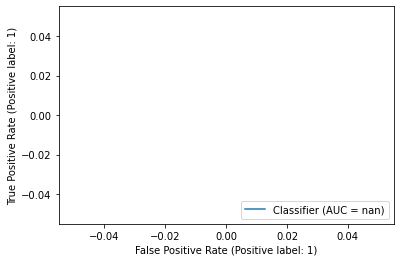

In [59]:
exp.plot_ROC()

In [7]:
FOLDER_DETECTOR = "../data/experiment_v06/qasm_bench_mid/predictions/ks"
FOLDER_INFO = "../data/experiment_v06/qasm_bench_mid/original_programs"

all_records = []

for filename, detector_res in iterate_over(FOLDER_DETECTOR, filetype=".json", parse_json=True):
    print(f"Reading: {filename}")
    # remove the comparison
    pairs = detector_res.pop('comparisons', None)
        
    for pair in pairs:
        new_record = {**pair, **detector_res}
        all_records.append(new_record)
        
df_detector_results = pd.DataFrame.from_records(all_records)

Reading: 8
Reading: 0
Reading: 4
Reading: 5
Reading: 1
Reading: 7
Reading: 2
Reading: 3
Reading: 10
Reading: 9
Reading: 6


In [12]:
df_detector_results.head()

,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,test,test_long_name,comparison_name,circuit_id,random_seed
0,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.494385,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
1,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.499634,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
2,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.494385,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
3,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.492065,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
4,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.493530,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None


In [13]:
TOP_K = 20
print(f"TOP_K={TOP_K} most evident divergences")
df_grouped = df_detector_results.groupby(by=[
    "circuit_id", "comparison_name", "test", "platform_a", "platform_b"
]).median().sort_values(by="p_value").reset_index()
df_grouped.head(TOP_K)

TOP_K=20 most evident divergences


,circuit_id,comparison_name,test,platform_a,platform_b,statistic,p_value
0,8,qasm_bench_mid,ks,cirq,qiskit,0.488525,0.000000e+00
1,1,qasm_bench_mid,ks,cirq,qiskit,0.258911,1.214427e-241
2,4,qasm_bench_mid,ks,cirq,qiskit,0.102661,5.508902e-38
3,3,qasm_bench_mid,ks,cirq,qiskit,0.013794,4.169149e-01
4,7,qasm_bench_mid,ks,cirq,qiskit,0.012573,5.365621e-01
5,0,qasm_bench_mid,ks,cirq,qiskit,0.011841,6.140617e-01
6,2,qasm_bench_mid,ks,cirq,qiskit,0.008545,9.259451e-01
7,10,qasm_bench_mid,ks,cirq,qiskit,0.000000,1.000000e+00
8,5,qasm_bench_mid,ks,cirq,qiskit,0.000000,1.000000e+00
9,6,qasm_bench_mid,ks,cirq,qiskit,0.000000,1.000000e+00


In [9]:

records = list(zip(*iterate_over(FOLDER_INFO, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,strategy_program_generation,circuit_id,benchmark_name
0,8,FamousCircuitGenerator,8,qasm_bench_mid
1,6,FamousCircuitGenerator,0,qasm_bench_mid
2,6,FamousCircuitGenerator,4,qasm_bench_mid
3,13,FamousCircuitGenerator,5,qasm_bench_mid
4,11,FamousCircuitGenerator,1,qasm_bench_mid


In [10]:
df_all = pd.merge(df_grouped, df_info, on="circuit_id")
df_all.head()

,circuit_id,statistic,p_value,n_qubits,strategy_program_generation,benchmark_name
0,8,0.488525,0.000000e+00,8,FamousCircuitGenerator,qasm_bench_mid
1,1,0.258911,1.214427e-241,11,FamousCircuitGenerator,qasm_bench_mid
2,4,0.102661,5.508902e-38,6,FamousCircuitGenerator,qasm_bench_mid
3,3,0.013794,4.169149e-01,15,FamousCircuitGenerator,qasm_bench_mid
4,7,0.012573,5.365621e-01,10,FamousCircuitGenerator,qasm_bench_mid


## Tket Dataset Proparation: Keep only qasm with less than 20 qubits

In [44]:
from utils import iterate_over
from qasm_manipulation import detect_registers

In [42]:
TKET_QASM = "../data/tket_benchmarking/arxiv-2003-10611/qasm_files"

In [54]:
# move programs under 20 bits in the tket folder
DEST_FOLDER = "../data/tket_benchmarking/executable_algos"

In [60]:
MEASURE_ALL = """
barrier q;
measure q -> c;
"""

In [66]:
executable_circuits = []
CUTOFF_QUBITS = 20
for filename, qasm_content in iterate_over(TKET_QASM, ".qasm", parse_json=False):
    #print(qasm_content)
    c_registers = detect_registers(qasm_content)
    quantum_bits = sum([
        reg[2]
        for reg in c_registers if reg[0] =='qreg' 
    ])
    
    if quantum_bits <= CUTOFF_QUBITS and len(c_registers) == 2:
        q_reg = [r for r in c_registers if r[1] == 'q']
        c_reg = [r for r in c_registers if r[1] == 'c']
        if (len(q_reg) > 0 and len(c_reg) > 0) and \
                (q_reg[0][1] == 'q' and q_reg[0][0] == 'qreg') and \
                (c_reg[0][1] == 'c' and c_reg[0][0] == 'creg') and \
                (c_reg[0][2] >= q_reg[0][2]):                 
            # save new file
            new_qasm = qasm_content + MEASURE_ALL
            print(c_registers)
            with open(os.path.join(DEST_FOLDER, f"{filename}.qasm"), 'w') as f:
                f.write(new_qasm)
                f.close()
            executable_circuits.append(f"{filename}.qasm")

[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('cre

In [53]:
len(executable_circuits)

137

In [58]:
import shutil

for filename in executable_circuits:
    filepath = os.path.join(TKET_QASM, filename)
    destpath = os.path.join(DEST_FOLDER, filename)
    print(f"Moving: {filename}")
    #shutil.copyfile(filepath, destpath)

Moving: one-two-three-v1_99.qasm
Moving: 4gt12-v0_87.qasm
Moving: 4gt5_75.qasm
Moving: ham7_104.qasm
Moving: hwb5_53.qasm
Moving: sym9_146.qasm
Moving: pf2_20_after.qasm
Moving: 4gt4-v0_72.qasm
Moving: cnt3-5_180.qasm
Moving: 4mod5-v0_20.qasm
Moving: rd32_270.qasm
Moving: rd73_140.qasm
Moving: one-two-three-v2_100.qasm
Moving: 4mod5-v0_18.qasm
Moving: 4gt4-v0_79.qasm
Moving: rd84_142.qasm
Moving: pf2_10_after.qasm
Moving: 4gt12-v1_89.qasm
Moving: mod8-10_178.qasm
Moving: 4gt13_92.qasm
Moving: ising_model_10.qasm
Moving: dc1_220.qasm
Moving: ex-1_166.qasm
Moving: C17_204.qasm
Moving: ex2_227.qasm
Moving: ex3_229.qasm
Moving: radd_250.qasm
Moving: cm82a_208.qasm
Moving: majority_239.qasm
Moving: rd53_138.qasm
Moving: aj-e11_165.qasm
Moving: qft_10.qasm
Moving: pf4_10_after.qasm
Moving: sqrt8_260.qasm
Moving: rd53_133.qasm
Moving: 4mod5-v1_23.qasm
Moving: rd53_130.qasm
Moving: mod5d1_63.qasm
Moving: alu-v4_36.qasm
Moving: pm1_249.qasm
Moving: z4_268.qasm
Moving: ising_model_13.qasm
Moving